<a href="https://colab.research.google.com/github/kefasmanu/NLP-FELLOWSHIP/blob/main/Quora%20%20text%20classification-jovian/nlp_sentiment_analysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [3]:
#Setting an environment variable
import os


In [1]:
#current directory
!pwd

/content


In [4]:
os.environ['KAGGLE_CONFIG_DIR']= '/content'

In [6]:
!chmod 600 /content/kaggle.json

In [8]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 189MB/s]


In [9]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [15]:
train_frame = 'data/train.tsv.zip'
test_frame = 'data/test.tsv.zip'
sub_frame = 'data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [16]:
import pandas as pd

In [17]:
raw_df = pd.read_csv(train_frame,sep='\t')
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [18]:
#taking sample of the data
raw_df.Phrase.sample(20)

68457                                       Python cartoons
115257                       Fincher and writer David Koepp
101955        so that the human story is pushed to one side
148788                                           lost ideal
145554                       fit in any modern action movie
155686    I have n't encountered since at least Pete 's ...
15547                                       its pretensions
108715                                    by David Hennings
78953     to be found in Sara Sugarman 's whimsical come...
59162                                     on his two lovers
112389                                          101 premise
66480     the sober-minded original was as graceful as a...
111018                                   effective portrait
22297                         of its sense of fun or energy
128573                                 restrained in others
17244                                 the artist three days
96179                 come in to the fil

In [20]:
test_df = pd.read_csv(test_frame, sep='\t')
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [22]:
sub_df =pd.read_csv(sub_frame)
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


EXPLORATION OF THE DATA

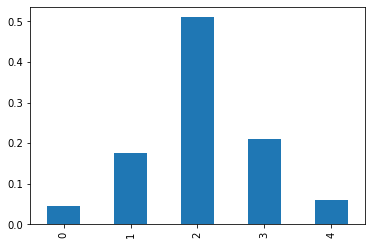

In [25]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

Summarize your insights and learnings from the dataset below:

* `???`
* `???`
* `???`

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [32]:
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
stemmer = SnowballStemmer(language='english')

In [39]:
def tokenize(text):
  return [stemmer.stem(token)  for token in word_tokenize(text) if token.isalpha()]

In [40]:
#testing the tokenize function
tokenize('Is this for real or a Fantasy?')

['is', 'this', 'for', 'real', 'or', 'a', 'fantasi']

In [46]:
from nltk.corpus import stopwords

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
english_stopwords = stopwords.words('english')

In [55]:
#note, some stopwors such as not, dont......are indicatior of sentiment
','.join(english_stopwords)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [54]:
selected_stopwords =english_stopwords[:115]

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:

vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words=selected_stopwords,
                            ngram_range=(1,2), #collection of more than one (two word occuring in sequence)                     
                            max_features=2000)

In [62]:
vectorizer.fit(raw_df.Phrase)

TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fa0ec65c280>)

In [63]:
len(vectorizer.vocabulary_)

2000

In [65]:
vectorizer.get_feature_names_out()[:200]# notice that we have bi-grams words, stopwords are removed

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [ ]:
#convert the imputs that we have into TFDF vectors

In [66]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [67]:
inputs = vectorizer.transform(raw_df['Phrase'])

In [68]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 473102 stored elements in Compressed Sparse Row format>

In [69]:
inputs.shape

(156060, 2000)

In [72]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [73]:
test_inputs = vectorizer.transform(test_df.Phrase)

In [74]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [75]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [77]:
#the raw df has been turned into sparse matrix 
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 473102 stored elements in Compressed Sparse Row format>

In [78]:
TRAIN_SIZE =110_000

In [85]:
train_inputs=inputs[:TRAIN_SIZE]
train_targets= raw_df.Sentiment[:TRAIN_SIZE]

In [86]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [102]:
#validation data
val_inputs = inputs[TRAIN_SIZE:]
val_targets= raw_df.Sentiment[TRAIN_SIZE:]

### Train Logistic Regression Model



In [103]:
from sklearn.linear_model import LogisticRegression

In [160]:
model=LogisticRegression()
#model=LogisticRegression(class_weight='balanced',max_iter=1000)# balancing the class and increasing the numbers of iterations from 100 to 2000

In [161]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [162]:
#making some prediction
train_preds = model.predict(train_inputs)

In [163]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [164]:
train_preds# note that the prediction is not the same|

array([3, 2, 2, ..., 0, 0, 2])

In [165]:
#Checking the Accuracy score
from sklearn.metrics import accuracy_score

In [166]:
accuracy_score(train_targets, train_preds)

0.6381818181818182

In [167]:
#for the validation set prediction
val_preds = model.predict(val_inputs)

In [168]:
#printing the validation targets to be compared to the val predictions
val_targets

110000    2
110001    0
110002    0
110003    1
110004    2
         ..
156055    2
156056    1
156057    3
156058    2
156059    2
Name: Sentiment, Length: 46060, dtype: int64

In [169]:
#printing the validation prediction
val_preds

array([2, 0, 0, ..., 2, 2, 2])

In [170]:
#Checking the accuracy
accuracy_score(val_targets, val_preds)

0.5795049934867564

### Study Predictions on Sample Inputs

In [171]:
small_df= raw_df.sample(20)
small_df

,PhraseId,SentenceId,Phrase,Sentiment
143499,143500,7788,limpid,2
112248,112249,5961,like to be smack in the middle of a war zone a...,2
125677,125678,6752,"odd , intriguing wrinkles",2
72398,72399,3700,Petri,2
44042,44043,2134,My Big Fat Greek Wedding look,2
14974,14975,643,warmth and longing,3
39971,39972,1911,by sumptuous ocean visuals and the cinematic s...,2
103358,103359,5449,in the story of Matthew Shepard,2
66088,66089,3352,the Cimarron,2
31934,31935,1495,"You would n't want to live waydowntown , but i...",3


In [172]:
#Vectorize
small_inputs = vectorizer.transform(small_df.Phrase)
small_inputs.shape

(20, 2000)

In [173]:
#making prediction from the sampled df
small_preds = model.predict(small_inputs)

In [174]:
small_preds

array([2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [175]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 181514 stored elements in Compressed Sparse Row format>

In [176]:
test_preds = model.predict(test_inputs)

In [177]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [178]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [179]:
sub_df.Sentiment= test_preds

In [180]:
sub_df.to_csv('submission.csv', index=None)


In [181]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,2
156066,3
156067,3
156068,2
156069,3


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips: 

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1 Naive Bayes

In [182]:
from sklearn.naive_bayes import MultinomialNB

In [183]:
model1 = MultinomialNB()

In [184]:
model1.fit(train_inputs,train_targets)

MultinomialNB()

In [187]:
#Accuracy on the training set
accuracy_score(train_targets, model1.predict(train_inputs))

0.5848363636363636

In [188]:
#Accuracy on the validation set
accuracy_score(val_targets, model1.predict(val_inputs))

0.5429005644811116

### Model 2

### Model 3

Best Model:

??? 

(include Kaggle score screenshot)

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
